Coefficients: a=0.23045171764850492, b=-1.8048218471684807, c=3.5358525840566757, d=0.043035417077609966


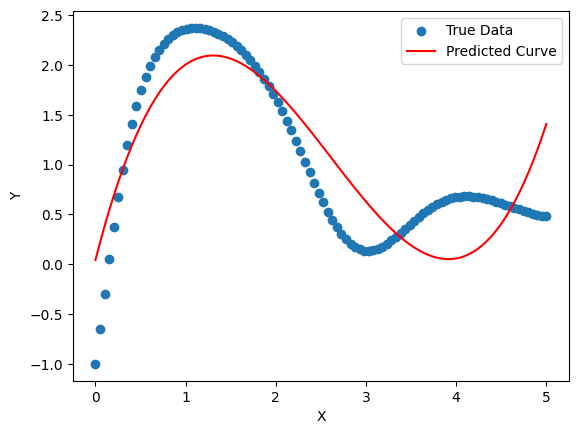

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Your data
x_data = np.array([0.0, 0.050505050505050504, 0.10101010101010101, 0.15151515151515152, 0.20202020202020202, 0.25252525252525254, 0.30303030303030304, 0.35353535353535354, 0.40404040404040403, 0.45454545454545453, 0.5050505050505051, 0.5555555555555556, 0.6060606060606061, 0.6565656565656566, 0.7070707070707071, 0.7575757575757576, 0.8080808080808081, 0.8585858585858586, 0.9090909090909091, 0.9595959595959596, 1.0101010101010102, 1.0606060606060606, 1.1111111111111112, 1.1616161616161615, 1.2121212121212122, 1.2626262626262625, 1.3131313131313131, 1.3636363636363635, 1.4141414141414141, 1.4646464646464648, 1.5151515151515151, 1.5656565656565657, 1.6161616161616161, 1.6666666666666667, 1.7171717171717171, 1.7676767676767677, 1.8181818181818181, 1.8686868686868687, 1.9191919191919191, 1.9696969696969697, 2.0202020202020203, 2.0707070707070705, 2.121212121212121, 2.1717171717171717, 2.2222222222222223, 2.272727272727273, 2.323232323232323, 2.3737373737373737, 2.4242424242424243, 2.474747474747475, 2.525252525252525, 2.5757575757575757, 2.6262626262626263, 2.676767676767677, 2.727272727272727, 2.7777777777777777, 2.8282828282828283, 2.878787878787879, 2.9292929292929295, 2.9797979797979797, 3.0303030303030303, 3.080808080808081, 3.1313131313131315, 3.1818181818181817, 3.2323232323232323, 3.282828282828283, 3.3333333333333335, 3.3838383838383836, 3.4343434343434343, 3.484848484848485, 3.5353535353535355, 3.585858585858586, 3.6363636363636362, 3.686868686868687, 3.7373737373737375, 3.787878787878788, 3.8383838383838382, 3.888888888888889, 3.9393939393939394, 3.98989898989899, 4.040404040404041, 4.090909090909091, 4.141414141414141, 4.191919191919192, 4.242424242424242, 4.292929292929293, 4.343434343434343, 4.393939393939394, 4.444444444444445, 4.494949494949495, 4.545454545454546, 4.595959595959596, 4.646464646464646, 4.696969696969697, 4.747474747474747, 4.797979797979798, 4.848484848484849, 4.898989898989899, 4.94949494949495, 5.0])
y_data = np.array([-1.0, -0.6454885308143319, -0.29341474009117935, 0.048870038398129645, 0.37400840650027467, 0.6757550795105742, 0.9497026307345801, 1.1935987773585437, 1.407022372688552, 1.5910725406345794, 1.747831688203171, 1.8798743354294565, 1.9900509383993472, 2.0810597251484775, 2.155420135218054, 2.2154908369676853, 2.2633601072516627, 2.3006813840483105, 2.328889634566629, 2.349235295292929, 2.3627654873877644, 2.3702340023132424, 2.3722301853669703, 2.369245489126876, 2.3616736676814187, 2.3497878641975776, 2.3337025023559126, 2.3134664913268557, 2.289084129850764, 2.2605151062379187, 2.227676789408081, 2.19042881150065, 2.1485514575059863, 2.101832287923809, 2.0500762101719747, 1.99310547858647, 1.9307596944214207, 1.8629217548712618, 1.7895081384009475, 1.7104715458900945, 1.6259244755283802, 1.536142645586903, 1.4415649944181665, 1.3427936804560952, 1.2405888237896925, 1.1357494349481143, 1.0295659473517518, 0.9235054972283385, 0.8190292704830887, 0.7175925026986938, 0.6206444791353259, 0.529628534730631, 0.4459728896155571, 0.37083266720072133, 0.30521885341555544, 0.24991704646386062, 0.20539768040233652, 0.17181602514057784, 0.1490121864410766, 0.13658887998289757, 0.1340344377583228, 0.14061581246397117, 0.1554622500681436, 0.1775672146404862, 0.20578838835199215, 0.23885367588237583, 0.2756034924791018, 0.31488547820688, 0.3555596436576893, 0.3965823806707672, 0.4370064623326135, 0.4759825894250904, 0.5127988478832604, 0.5468272919275619, 0.5775528129026793, 0.6045962167496468, 0.6277142240058474, 0.6467994698050122, 0.6618518171196774, 0.6728910519190769, 0.6800215435132647, 0.6834100771982142, 0.683283858422963, 0.6799305127896126, 0.673698086053329, 0.6649892240160198, 0.6541361629311506, 0.6415209960380086, 0.6275505342533958, 0.6126138817634975, 0.59708243602388, 0.5813098877594934, 0.5656322209646698, 0.5503677129031223, 0.5357892385493709, 0.5221371976738899, 0.5096428436331847, 0.49848793240630473, 0.48880457959929957, 0.480675260445219])

# Define the polynomial function
def polynomial(params, x):
    a, b, c, d = params
    return a * x**3 + b * x**2 + c * x + d

# Define a custom loss function (mean squared error)
def custom_loss(params):
    y_pred = polynomial(params, x_data)
    return np.mean((y_data - y_pred) ** 2)

# Initial guess for the parameters
initial_guess = [1, 1, 1, 1]

# Use a numerical optimization method to minimize the loss
result = minimize(custom_loss, initial_guess, method='Nelder-Mead')

# Extract the fitted parameters
fitted_params = result.x

# Print the coefficients
a, b, c, d = fitted_params
print(f"Coefficients: a={a}, b={b}, c={c}, d={d}")

# Generate points for the predicted curve
x_pred = np.linspace(min(x_data), max(x_data), 100)
y_pred = polynomial(fitted_params, x_pred)

# Plot the true data points
plt.scatter(x_data, y_data, label='True Data')

# Plot the predicted curve
plt.plot(x_pred, y_pred, 'r', label='Predicted Curve')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
